In [0]:
import gym
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [0]:
class MountainCar():
    def __init__(self, env):
        self.env = env
        self.env._max_episode_steps = 1000
        self.episodes = 50000
        
        self.pos_space = np.linspace(-1.2, 0.6, 30)
        self.vel_space = np.linspace(-0.07, 0.07, 30)

        self.lr = 0.1
        self.gamma = 0.99
        self.eps = 1.0

    def make_discrete_states(self, obs):
        pos, vel = obs
        pos_disc = np.digitize(pos, self.pos_space)
        vel_disc = np.digitize(vel, self.vel_space)

        return (pos_disc, vel_disc)
    
    def pick_best_action(self, state):
        values = np.array([self.Q[state, action] for action in [0, 1, 2]])
        return np.argmax(values)

    def run_episode(self, state):
        done = False
        score = 0
        while not done:
            action = np.random.randint(3) if np.random.random() < self.eps \
                else self.pick_best_action(state)
            
            state_, reward, done, _ = self.env.step(action)
            state_ = self.make_discrete_states(state_)
            score += reward

            action_ = self.pick_best_action(state_)
            self.Q[state, action] = self.Q[state, action] + self.lr*(reward + self.gamma* \
                            self.Q[state_, action_] - self.Q[state, action])
            state = state_

        return score

    def start_env(self):
        states = []
        for pos in range(31):
            for vel in range(31):
                states.append((pos, vel))

        self.Q = {}
        for state in states:
            for action in [0, 1, 2]:
                self.Q[state, action] = 0
        rewards = []
        for ep in range(self.episodes):
            state = self.make_discrete_states(self.env.reset())
            rewards.append(self.run_episode(state))
            self.eps = self.eps - 2/self.episodes if self.eps > 0.01 else 0.01
            if ep % 2000 == 0 and ep > 0:
                print(rewards[ep])

        return rewards

In [65]:
env = gym.make("MountainCar-v0")

car_env = MountainCar(env)
rewards = car_env.start_env()

mean = np.zeros(car_env.episodes)
for t in range(car_env.episodes):
    mean[t] = np.mean(rewards[max(0, t-50):t+1])

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


-1000.0
-791.0
-327.0
-416.0
-354.0
-227.0
-269.0
-195.0
-181.0
-189.0
-155.0
-182.0
-186.0
-124.0
-118.0
-150.0
-150.0
-120.0
-144.0
-143.0
-143.0
-117.0
-137.0
-152.0


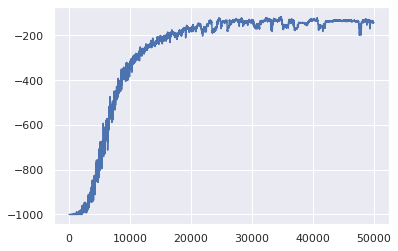

In [66]:
plt.plot(np.array(mean))
plt.savefig("output_reward_alot.png")